# [COVID19 Data](https://github.com/suen049/COVID19-Data-IBSDataScienceGroup) @ [Data Science Group](https://www.ibs.re.kr/ds/), [IBS](https://www.ibs.re.kr/eng.do)

By [Meeyoung Cha](https://ds.kaist.ac.kr/professor.html), [Diego Saez-Trumper](https://wikimediafoundation.org/profile/diego-saez-trumper/), [Jing Ma](https://www.researchgate.net/profile/Jing_Ma78), Changwook Jung, Sung Jun Park, Geng Sun

You can see more contents and graphs through our project website: [COVID-19](https://ds.ibs.re.kr/index.php/covid-19/)

This repository is used to share the data we collected about COVID2019. The data files are stored in the ./Data/ directory in .csv format.

In [1]:
# storing and anaysis
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from plotnine import *
import calmap

import plotly.express as px
import folium


Bad key "text.kerning_factor" on line 4 in
/opt/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


## File 1: LatestDailyData.csv
This document provides the latest daily updates on the status of individual countries.

In [2]:
data = pd.read_csv("./Data/LatestDailyData.csv")

In [3]:
data.head()

Country/Region Province/State  Confirmed  Deaths  Recovered  Still Infected
0    Afghanistan            NaN          4       0          0               4
1        Algeria            NaN         19       0          0              19
2        Andorra            NaN          1       0          0               1
3      Argentina            NaN         12       1          0              11
4        Armenia            NaN          1       0          0               1

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Country/Region  254 non-null    object
 1   Province/State  154 non-null    object
 2   Confirmed       254 non-null    int64 
 3   Deaths          254 non-null    int64 
 4   Recovered       254 non-null    int64 
 5   Still Infected  254 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 12.0+ KB


In [5]:
fig = px.bar(data[['Country/Region', 'Confirmed']].sort_values('Confirmed', ascending=False), 
             y="Confirmed", x="Country/Region", color='Country/Region', 
             log_y=True, template='ggplot2', title='Confirmed Cases')
fig.show()

## File 2: DailyNewNumberOfWorld.csv
This document gives the total daily confirmed, deaths, and recovery in the world

In [6]:
data = pd.read_csv("./Data/DailyNewNumberOfWorld.csv")

In [7]:
data.head()

Date  Confirmed  Deaths  Recovered
0  2020-01-22        NaN     NaN        NaN
1  2020-01-23       98.0     1.0        2.0
2  2020-01-24      288.0     8.0        6.0
3  2020-01-25      493.0    16.0        3.0
4  2020-01-26      684.0    14.0       13.0

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       47 non-null     object 
 1   Confirmed  46 non-null     float64
 2   Deaths     46 non-null     float64
 3   Recovered  46 non-null     float64
dtypes: float64(3), object(1)
memory usage: 1.6+ KB


In [9]:
fig = px.bar(data, x="Date", y="Confirmed", title='Numbers of Comfirmed All Over the world')
fig.show()
fig = px.bar(data, x="Date", y="Recovered", title='Numbers of Recovered All Over the world')
fig.show()
fig = px.bar(data, x="Date", y="Deaths", title='Numbers of Deaths All Over the world')            
fig.show()

## File 3: DailyTotalNumberInEachCountry.csv
This document gives the total daily diagnoses, deaths, and recovery in each counrty respctively.

In [10]:
data = pd.read_csv("./Data/DailyTotalNumberInEachCountry.csv")

In [11]:
data.head()

Unnamed: 0 Country/Region        Date  Confirmed  Deaths  Recovered
0           0    Afghanistan  2020-01-22          0       0          0
1           1    Afghanistan  2020-01-23          0       0          0
2           2    Afghanistan  2020-01-24          0       0          0
3           3    Afghanistan  2020-01-25          0       0          0
4           4    Afghanistan  2020-01-26          0       0          0

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5029 entries, 0 to 5028
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      5029 non-null   int64 
 1   Country/Region  5029 non-null   object
 2   Date            5029 non-null   object
 3   Confirmed       5029 non-null   int64 
 4   Deaths          5029 non-null   int64 
 5   Recovered       5029 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 235.9+ KB


In [13]:
fig = px.bar(data, x="Date", y="Confirmed", color='Country/Region', title='Number of Confirmed In Each Country')
fig.show()
fig = px.bar(data, x="Date", y="Recovered", color='Country/Region', title='Number of Recovered In Each Country')
fig.show()
fig = px.bar(data, x="Date", y="Deaths", color='Country/Region', title='Number of Deaths In Each Country')
fig.show()

## File 4: TotalNumbersInEachCountry.csv
This document gives the total accumulative confirmed, deaths, and recovery in Each country.
<br>It is also divided into three following files:
+ File 5: TotalConfirmedNumberInEachCountry.csv
+ File 6: TotalRecoveredNumberInEachCountry.csv
+ File 7: TotalDeathsNumberInEachCountry.csv

In [14]:
data = pd.read_csv("./Data/TotalNumbersInEachCountry.csv")

In [15]:
data.head()

Unnamed: 0 Country/Region  Confirmed  Deaths  Recovered
0          20          China      80699    3097      57320
1          47          Italy       7375     366        622
2          92    South Korea       7314      50        118
3          43           Iran       6566     194       2134
4          32         France       1126      19         12

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      107 non-null    int64 
 1   Country/Region  107 non-null    object
 2   Confirmed       107 non-null    int64 
 3   Deaths          107 non-null    int64 
 4   Recovered       107 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 4.3+ KB


In [17]:
fig = px.bar(data, x="Country/Region", y="Confirmed", color='Country/Region', title='Number of Confirmed In Each Country')
fig.show()
fig = px.bar(data, x="Country/Region", y="Recovered", color='Country/Region', title='Number of Recovered In Each Country')
fig.show()
fig = px.bar(data, x="Country/Region", y="Deaths", color='Country/Region', title='Number of Deaths In Each Country')
fig.show()

## File 8: TotalNumbersInEachProvinceInChina.csv
This document gives the total accumulative confirmed, deaths, and recovery in each province of China. This whole data have already been included in the file 4 TotalNumbersInEachCountry.csv. Still, we list it here seperately.

In [18]:
data = pd.read_csv("./Data/TotalNumbersInEachProvinceInChina.csv")

In [19]:
data.head()

Unnamed: 0 Province/State  Confirmed  Deaths  Recovered
0           0          Hubei      67707    2986      45235
1           1      Guangdong       1352       7       1256
2           2          Henan       1272      22       1247
3           3       Zhejiang       1215       1       1161
4           4          Hunan       1018       4        968

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      31 non-null     int64 
 1   Province/State  31 non-null     object
 2   Confirmed       31 non-null     int64 
 3   Deaths          31 non-null     int64 
 4   Recovered       31 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.3+ KB


In [21]:
fig = px.bar(data, x="Province/State", y="Confirmed", color='Province/State', title='Number of Confirmed In Each Province of China')
fig.show()
fig = px.bar(data, x="Province/State", y="Recovered", color='Province/State', title='Number of Recovered In Each Province of China')
fig.show()
fig = px.bar(data, x="Province/State", y="Deaths", color='Province/State', title='Number of Deaths In Each Province of China')
fig.show()

## File 9 : StandardizedTimeSeries.csv
You can se from the file's name. It provides the time series data of confirmed/recovered/deaths number in each country  similar to File 3: DailyTotalNumberInEachCountry.csv. but we standardize it and list here seperately to give a close look at the different patterns of each country. So as File 10 : StandardizedTimeSeriesDataOfComfirmed.csv. We list the confirmed number seperately

In [22]:
data = pd.read_csv("./Data/StandardizedTimeSeriesData.csv")

In [23]:
data.head()

Unnamed: 0 Country/Region        Date  Confirmed  Deaths  Recovered
0           0    Afghanistan  2020-01-22        NaN     NaN        NaN
1           1    Afghanistan  2020-01-23        0.0     0.0        0.0
2           2    Afghanistan  2020-01-24        0.0     0.0        0.0
3           3    Afghanistan  2020-01-25        0.0     0.0        0.0
4           4    Afghanistan  2020-01-26        0.0     0.0        0.0

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5029 entries, 0 to 5028
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      5029 non-null   int64  
 1   Country/Region  5029 non-null   object 
 2   Date            5029 non-null   object 
 3   Confirmed       4922 non-null   float64
 4   Deaths          4922 non-null   float64
 5   Recovered       4922 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 235.9+ KB


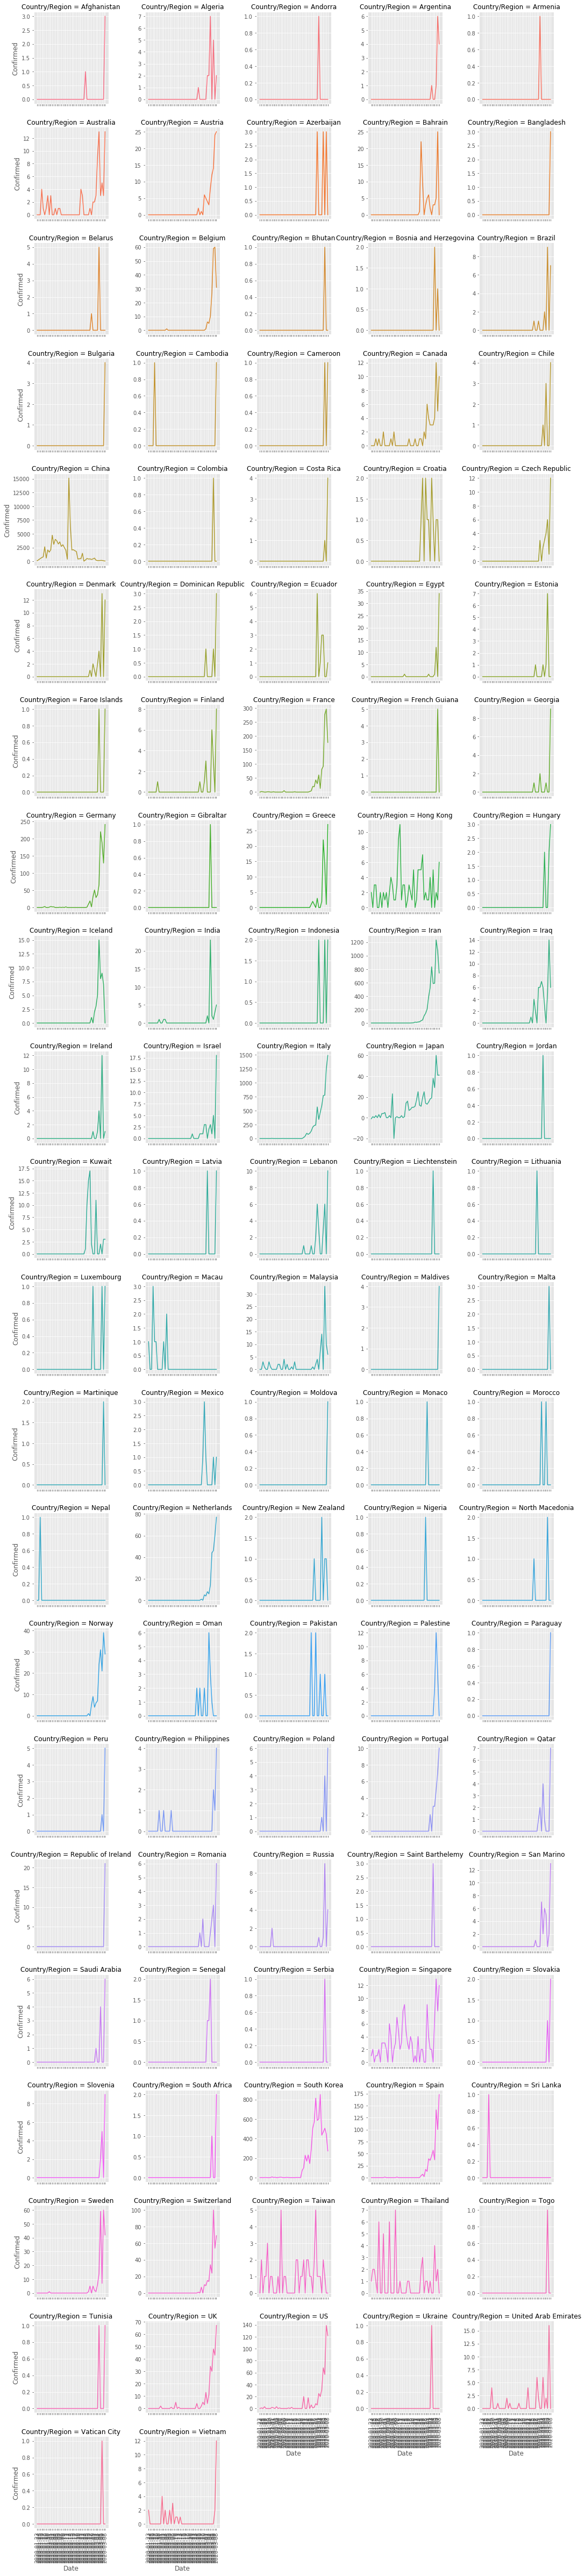

In [25]:
plt.style.use('ggplot')
g = sns.FacetGrid(data, col="Country/Region", hue="Country/Region", sharey=False, col_wrap=5)
g = g.map(sns.lineplot, "Date", "Confirmed")
g.set_xticklabels(rotation=90)
plt.show()

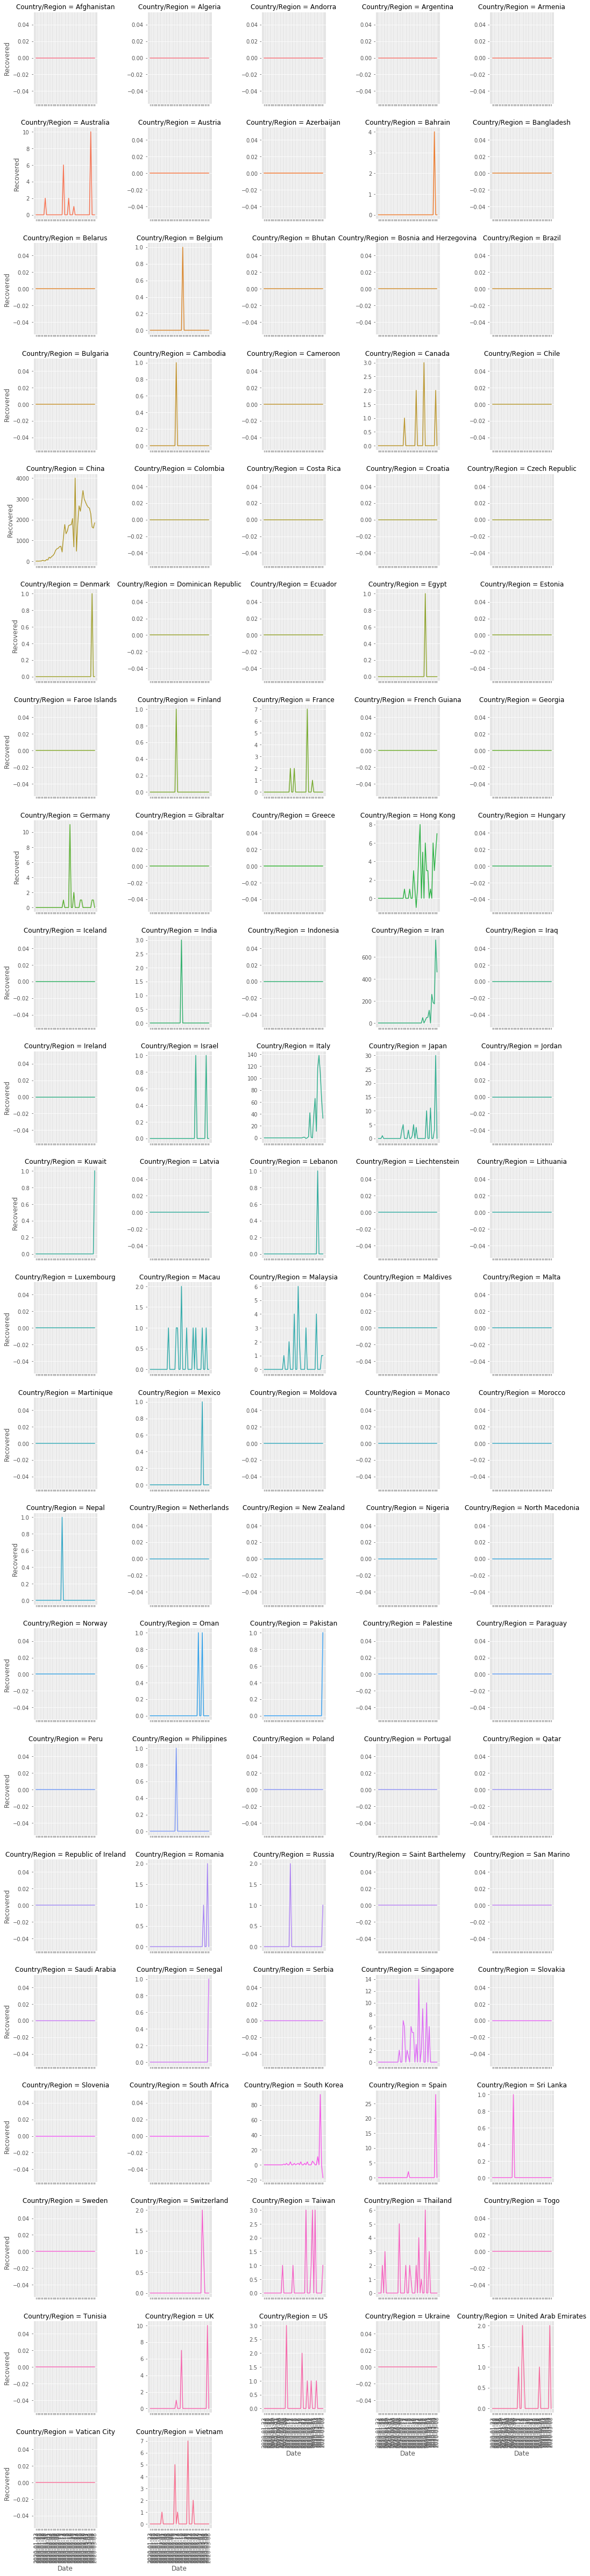

In [26]:
plt.style.use('ggplot')
g = sns.FacetGrid(data, col="Country/Region", hue="Country/Region", sharey=False, col_wrap=5)
g = g.map(sns.lineplot, "Date", "Recovered")
g.set_xticklabels(rotation=90)
plt.show()

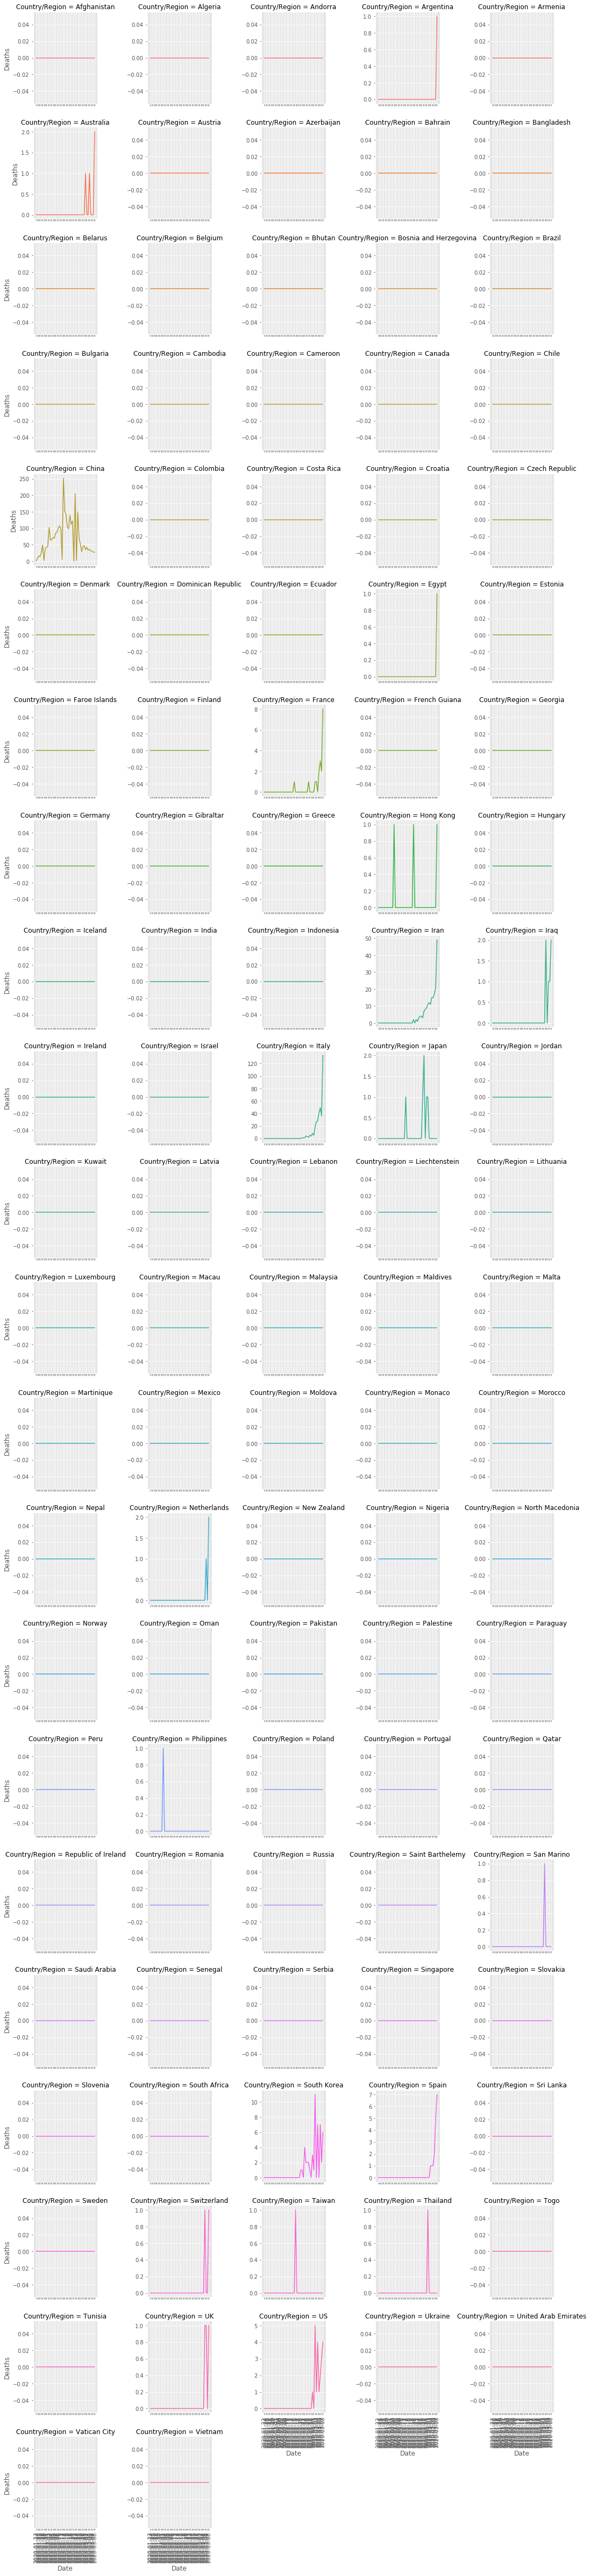

In [27]:
plt.style.use('ggplot')
g = sns.FacetGrid(data, col="Country/Region", hue="Country/Region", sharey=False, col_wrap=5)
g = g.map(sns.lineplot, "Date", "Deaths")
g.set_xticklabels(rotation=90)
plt.show()

## File 10 : StandardizedTimeSeriesDataOfComfirmed.csv
Included in File 9 StandardizedTimeSeries.csv. Listed seperately to enhance it.

In [28]:
data = pd.read_csv("./Data/StandardizedTimeSeriesDataOfComfirmed.csv")

In [29]:
data.head()

Unnamed: 0        Date Country/Region  Confirmed
0           0  2020-01-22    Afghanistan          0
1           1  2020-01-22        Algeria          0
2           2  2020-01-22        Andorra          0
3           3  2020-01-22      Argentina          0
4           4  2020-01-22        Armenia          0

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5029 entries, 0 to 5028
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      5029 non-null   int64 
 1   Date            5029 non-null   object
 2   Country/Region  5029 non-null   object
 3   Confirmed       5029 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 157.3+ KB


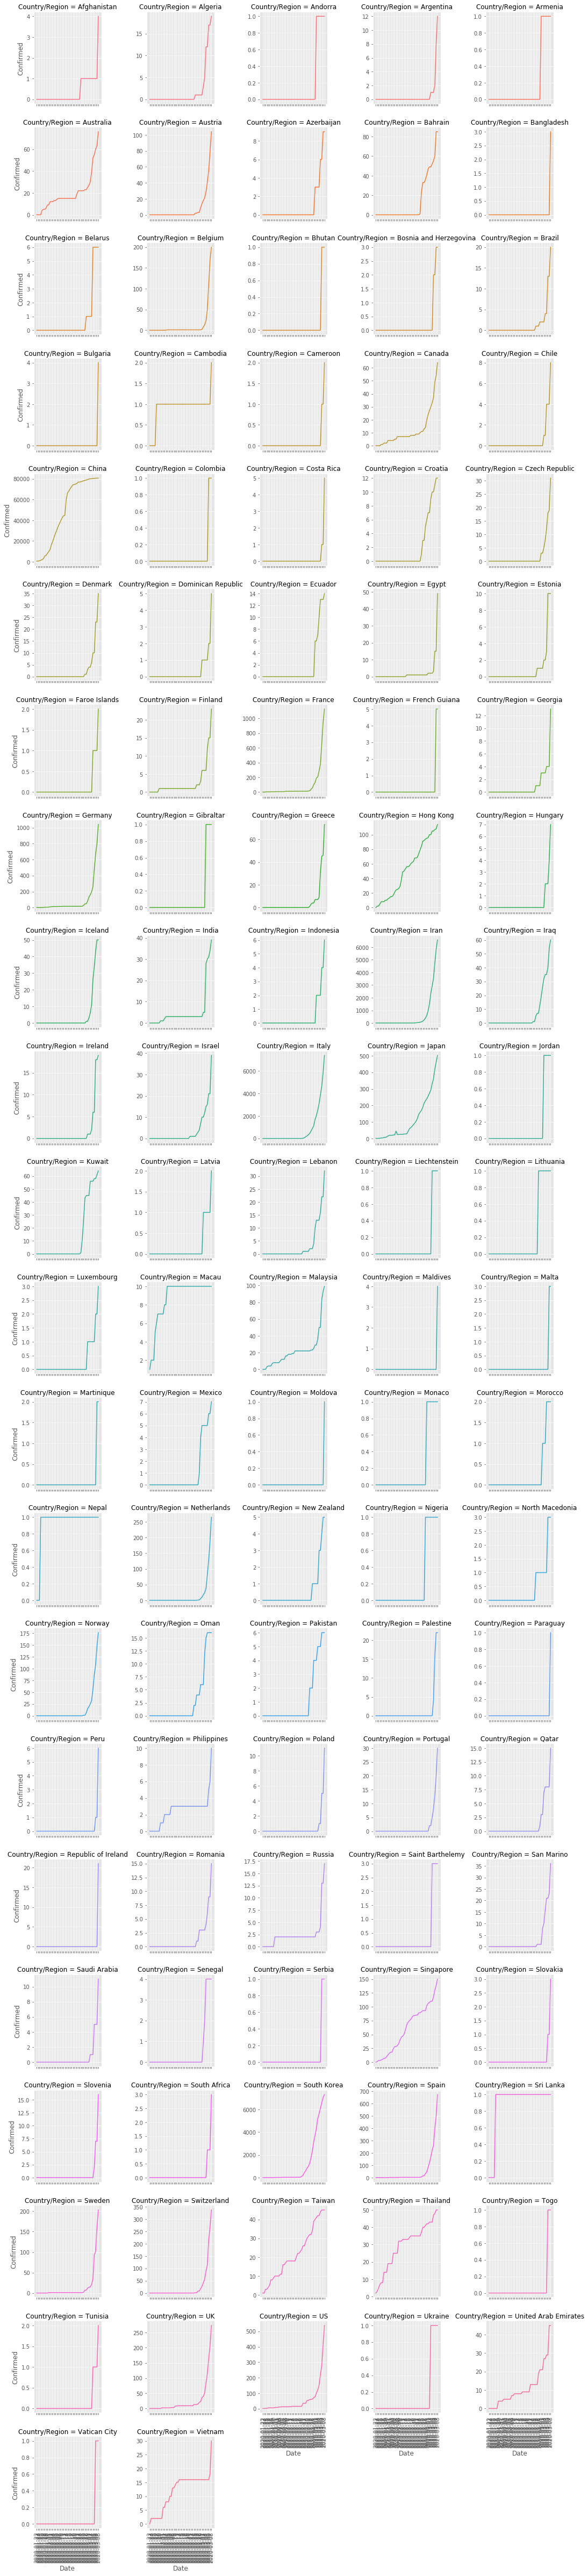

In [31]:
plt.style.use('ggplot')
g = sns.FacetGrid(data, col="Country/Region", hue="Country/Region", sharey=False, col_wrap=5)
g = g.map(sns.lineplot, "Date", "Confirmed")
g.set_xticklabels(rotation=90)
plt.show()